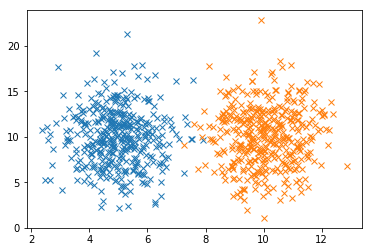

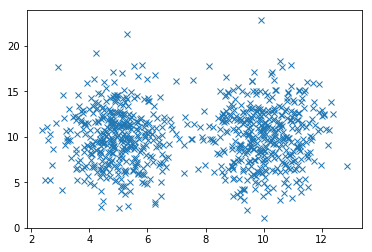

In [127]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

def kmeans(X,nclusters,iteraciones=100):
    SumPrevious = np.inf
    centers = np.random.rand(nclusters,Xdata.shape[1])
    
    for j in range(iteraciones):
        distances = np.empty(shape=(Xdata.shape[0],0))
        for i in range(centers.shape[0]):
            distancesToClusterI = np.linalg.norm(X-centers[i],axis=1)
            distances = np.concatenate((distances,distancesToClusterI[:,None]),axis=1)

        assignment = np.argmin(distances,axis=1)
        
        Sum = 0
        for i in range(centers.shape[0]):
            centers[i] = np.mean(X[assignment == i],axis=0)

            distancesToClusterI = np.sum(np.linalg.norm(X[assignment == i] - centers[i],axis=1))
            Sum = Sum + distancesToClusterI

        if Sum >= SumPrevious:
            break
            
        print(Sum)
            
        SumPrevious = Sum
    return assignment

#Creación de los datos
mean = [5, 10]
cov = [[1, 0], [0, 10]]  # diagonal covariance
x1, x2 = np.random.multivariate_normal(mean, cov, 400).T
plt.plot(x1, x2, 'x')

X_C1 = np.concatenate((x1[:,None],x2[:,None]),axis=1)
Y_C1 = np.zeros(shape = (400,1))

mean = [10, 10]
cov = [[1, 0], [0, 10]]  # diagonal covariance
x1, x2 = np.random.multivariate_normal(mean, cov, 400).T
plt.plot(x1, x2, 'x')
plt.show()

X_C2 = np.concatenate((x1[:,None],x2[:,None]),axis=1)
Y_C2 = np.ones(shape = (400,1))

Xdata = np.concatenate((X_C1,X_C2),axis=0)
Ydata = np.concatenate((Y_C1,Y_C2),axis=0)
plt.plot(Xdata[:,0], Xdata[:,1], 'x')
plt.show()

In [128]:
kmeans(Xdata,2)

3096.87126003906


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [152]:
def kmeans(X,nclusters,iteraciones=100, tol = 10e-4):
    SumPrevious = np.inf
    
    Subsamples = np.random.random_integers(X.shape[0], size=(nclusters))
    
    centers = X[Subsamples,:]
    
    for j in range(iteraciones):
        distances = np.empty(shape=(Xdata.shape[0],0))
        for i in range(centers.shape[0]):
            distancesToClusterI = np.linalg.norm(X-centers[i],axis=1)
            distances = np.concatenate((distances,distancesToClusterI[:,None]),axis=1)

        assignment = np.argmin(distances,axis=1)
        
        Sum = 0
        for i in range(centers.shape[0]):
            centers[i] = np.mean(X[assignment == i],axis=0)

            distancesToClusterI = np.sum(np.linalg.norm(X[assignment == i] - centers[i],axis=1))
            Sum = Sum + distancesToClusterI

        if np.abs(Sum - SumPrevious) < tol:
            break
            
        print(Sum)
            
        SumPrevious = Sum
    return assignment

[[ 9.67311599  7.45576591]
 [ 6.41686712 14.43177629]]
2529.0920364224285
2524.479828264952
2518.3422407089993
2514.12332832604
2512.7713487759365
2511.787691256127
2509.8590452311146
2509.5356839137585
2508.9829855593925
2508.4937253805356
2507.816891906232
2507.698109757498
2507.5736408471275


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 800 + 1) instead
  after removing the cwd from sys.path.


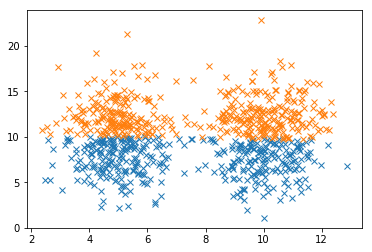

In [158]:
nclusters=2
assign = kmeans(Xdata,nclusters)
for i in range(nclusters):
    plt.plot(Xdata[assign == i,0], Xdata[assign == i,1], 'x')
plt.show()

In [164]:
def kmeans(X,nclusters,iteraciones=100, tol = 10e-4):
    SumPrevious = np.inf
    
    Subsamples = np.random.random_integers(X.shape[0], size=(nclusters))
    
    centers = X[Subsamples,:]
    
    for j in range(iteraciones):
        distances = np.empty(shape=(Xdata.shape[0],0))
        for i in range(centers.shape[0]):
            distancesToClusterI = np.linalg.norm(X-centers[i],axis=1)
            distances = np.concatenate((distances,distancesToClusterI[:,None]),axis=1)

        assignment = np.argmin(distances,axis=1)
        
        for i in range(nclusters):
            plt.plot(X[assignment == i,0], X[assignment == i,1], 'x')
        plt.show()
        
        Sum = 0
        for i in range(centers.shape[0]):
            centers[i] = np.mean(X[assignment == i],axis=0)

            distancesToClusterI = np.sum(np.linalg.norm(X[assignment == i] - centers[i],axis=1))
            Sum = Sum + distancesToClusterI

        if np.abs(Sum - SumPrevious) < tol:
            break
            
        SumPrevious = Sum
    return assignment

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 800 + 1) instead
  after removing the cwd from sys.path.


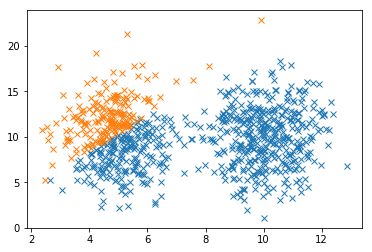

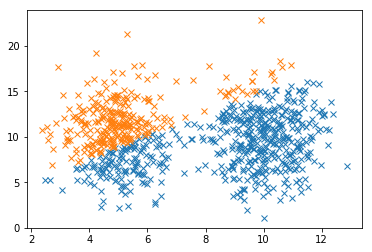

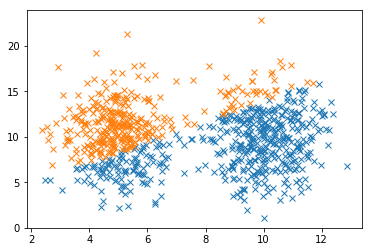

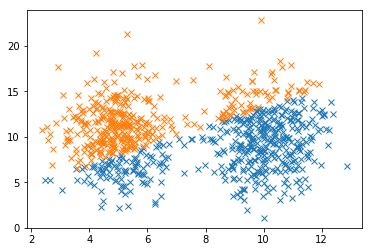

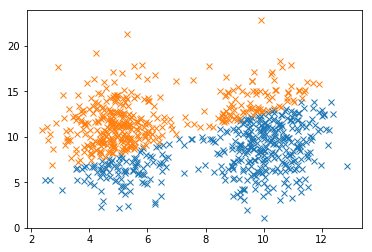

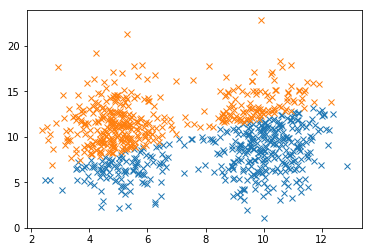

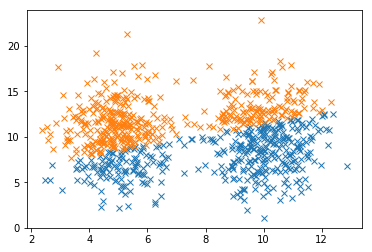

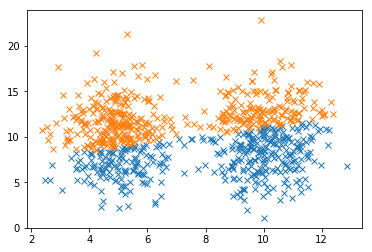

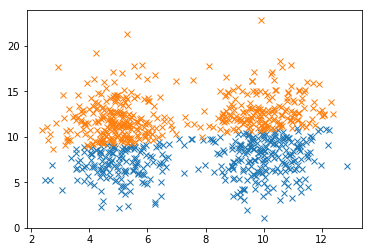

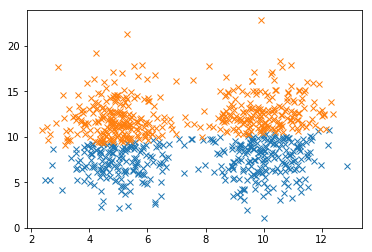

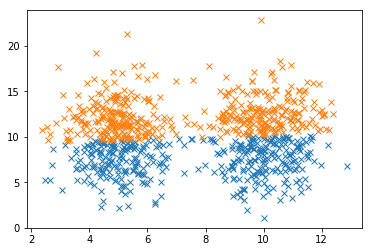

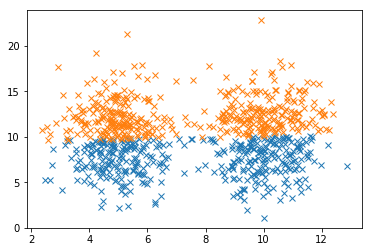

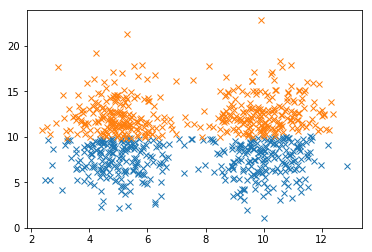

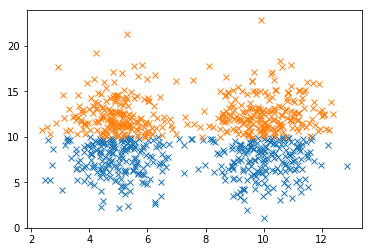

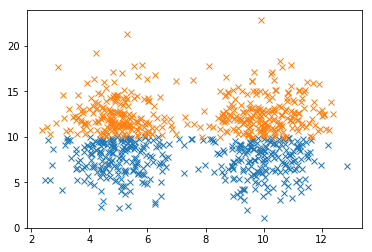

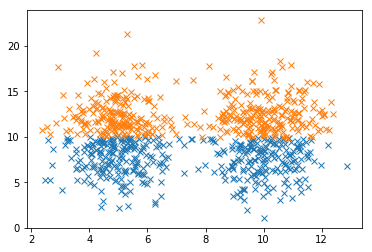

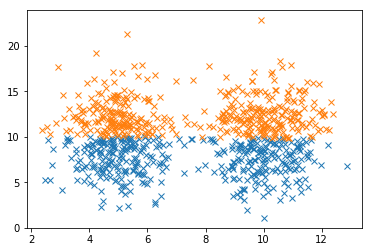

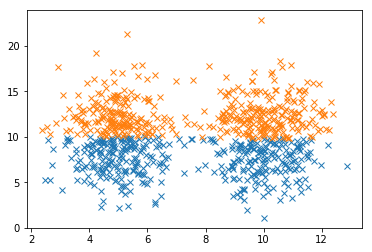

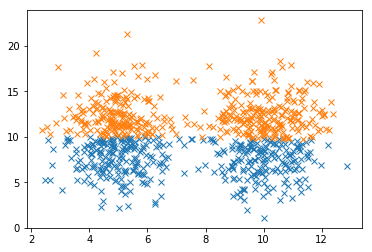

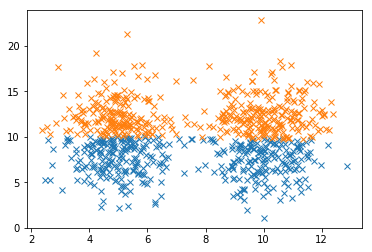

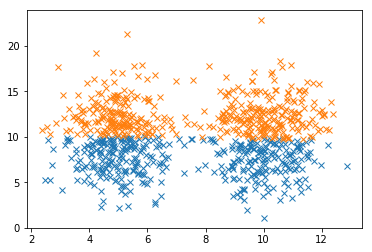

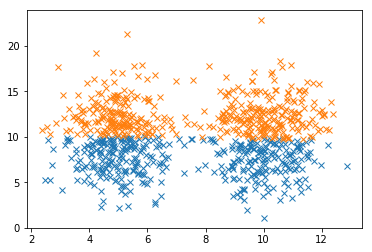

In [169]:
A = kmeans(Xdata,nclusters)